#  IPL Cricket Dataset - Exploratory Data Analysis (EDA)

## Task 2: EDA


In [32]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_batting.csv')

# Clean columns: strip spaces and lower case (optional)
df.columns = df.columns.str.strip().str.lower()

# Preview dataset
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Dataset shape: (699, 11)
Columns: ['match', 'teaminnings', 'battingpos', 'batsmanname', 'runs', 'balls', '4s', '6s', 'sr', 'out/not_out', 'match_id']


,match,teaminnings,battingpos,batsmanname,runs,balls,4s,6s,sr,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


## Data Structure and Overview

In [33]:
# Data types and missing values
print(df.info())

# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teaminnings  699 non-null    object
 2   battingpos   699 non-null    int64 
 3   batsmanname  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   sr           699 non-null    object
 9   out/not_out  699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB
None

Missing values in each column:
match          0
teaminnings    0
battingpos     0
batsmanname    0
runs           0
balls          0
4s             0
6s             0
sr             0
out/not_out    0
match_id       0
dtype: int64


## Basic Statistics 

In [34]:
# statistics for numeric columns
df.describe()


,battingpos,runs,balls,4s,6s
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.979971,15.978541,13.648069,1.300429,0.473534
std,2.813628,18.709462,12.718093,1.834448,0.978465
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,0.000000,0.000000
50%,5.000000,9.000000,10.000000,1.000000,0.000000
75%,7.000000,22.500000,19.000000,2.000000,1.000000
max,11.000000,109.000000,64.000000,10.000000,8.000000


## Exploratory Analysis: Key Questions

Which batsman scored the most runs?

How does batting position affect average runs scored?

What is the distribution of runs scored?

What is the relationship between balls faced and runs scored?

How do boundaries (4s, 6s) contribute to total runs?

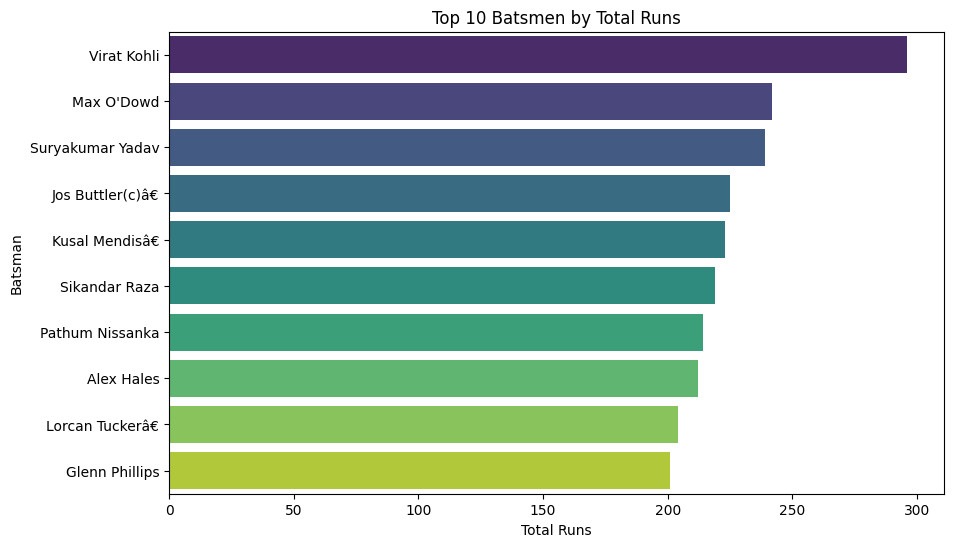

In [35]:
# 1. Top 10 run scorers
top_batsmen = df.groupby('batsmanname')['runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


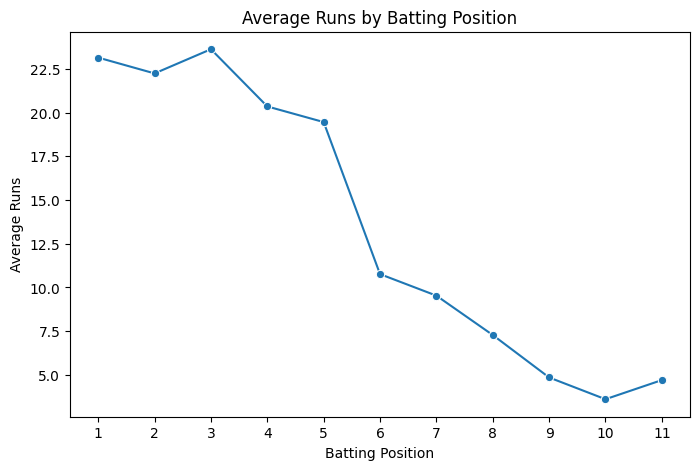

In [36]:
# 2. Average runs by batting position
avg_runs_by_pos = df.groupby('battingpos')['runs'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_runs_by_pos.index, y=avg_runs_by_pos.values, marker='o')
plt.title('Average Runs by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Average Runs')
plt.xticks(range(1,12))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


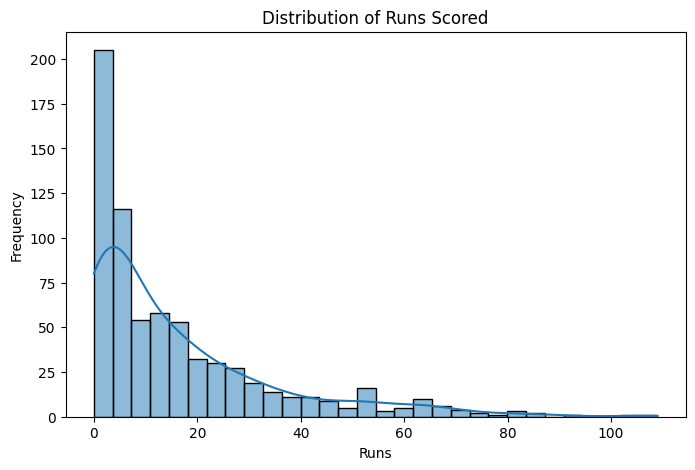

In [37]:
# 3. Distribution of runs scored
plt.figure(figsize=(8,5))
sns.histplot(df['runs'], bins=30, kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


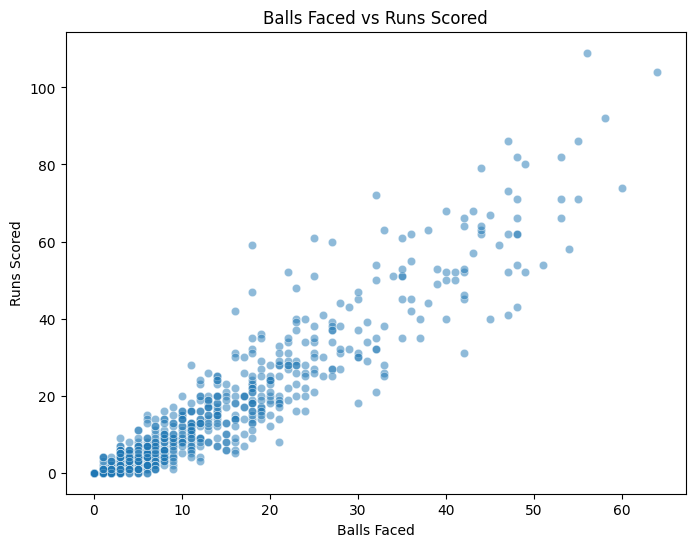

In [38]:
# 4. Scatter plot: Balls faced vs Runs scored
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='balls', y='runs', alpha=0.5)
plt.title('Balls Faced vs Runs Scored')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.show()


/tmp/ipykernel_35/228164163.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['boundary_percentage'].replace([float('inf'), -float('inf')], 0, inplace=True)  # handle division by zero
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


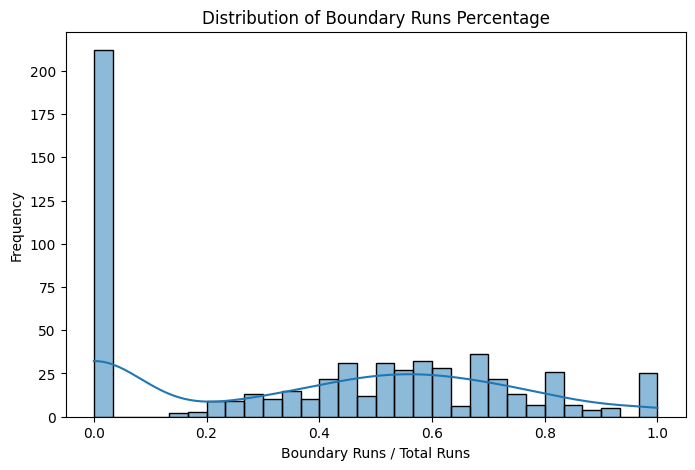

In [39]:
# 5. Contribution of boundaries to total runs
df['boundary_runs'] = df['4s']*4 + df['6s']*6
df['boundary_percentage'] = df['boundary_runs'] / df['runs']
df['boundary_percentage'].replace([float('inf'), -float('inf')], 0, inplace=True)  # handle division by zero

plt.figure(figsize=(8,5))
sns.histplot(df['boundary_percentage'], bins=30, kde=True)
plt.title('Distribution of Boundary Runs Percentage')
plt.xlabel('Boundary Runs / Total Runs')
plt.ylabel('Frequency')
plt.show()


## Hypothesis Testing and Assumptions


In [40]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['battingpos'], df['runs'])
print(f"Spearman correlation between batting position and runs scored: {corr:.3f} (p-value: {p_value:.3f})")


Spearman correlation between batting position and runs scored: -0.383 (p-value: 0.000)


## Detecting Data Issues

In [46]:
# Check runs >= boundary runs
inconsistent = df[df['runs'] < df['boundary_runs']]
print(f"Number of rows where runs < boundary runs: {inconsistent.shape[0]}")

# Inspect some inconsistent rows if any
if inconsistent.shape[0] > 0:
    print(inconsistent[['batsmanname', 'runs', '4s', '6s', 'boundary_runs']].head())


Number of rows where runs < boundary runs: 0
